In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [3]:
sequence=np.array([i for i in range(1,101)])
window_size=3
x=[]
y=[]
for i in range(len(sequence)-window_size):
    x.append(sequence[i:i+window_size])
    y.append(sequence[i+window_size])
x=np.array(x)
y=np.array(y)
x=x.reshape((x.shape[0],x.shape[1],1))



In [19]:
model=Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=(3,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.fit(x,y,epochs=500,verbose=0)
print("training completed")

training completed


In [22]:
test_input=np.array([20,21,22])
test_input=test_input.reshape((1,window_size,1))
predicted=model.predict(test_input,verbose=0)
print(f"predicted next number:{predicted[0][0].item():.2f}")

predicted next number:22.84


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


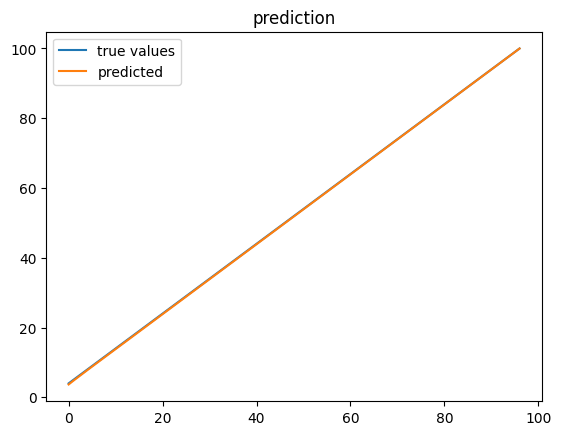

In [23]:
predictions=model.predict(x)
plt.plot(y,label='true values')
plt.plot(predictions,label='predicted')
plt.legend()
plt.title("prediction")
plt.show()

In [25]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [26]:
with open('/content/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    print("model loaded")

model loaded


In [27]:
import numpy as np

# Ask the user to enter a sequence of numbers
input_str = input("Enter your input sequence (e.g., 11 12 13): ")

# Convert input to NumPy array of shape (1, window_size, 1)
input_list = list(map(float, input_str.strip().split()))
window_size = len(input_list)  # infer window size from user input

my_input = np.array(input_list).reshape((1, window_size, 1))

# Get prediction from the loaded model
my_prediction = loaded_model.predict(my_input)

# Print input and predicted output
print(f"Input: {my_input.flatten()}")
print(f"Predicted output: {my_prediction[0][0]}")

Enter your input sequence (e.g., 11 12 13): 30 31 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Input: [30. 31. 32.]
Predicted output: 32.85908889770508
